In [55]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir(r'C:\Users\mmandziej001\Desktop\FCU\SCRIPTS\predictive_qc_db')

In [40]:
train = pd.read_csv(r"models\results\merged\model_performance\nn_train_merged.csv")
test = pd.read_csv(r"models\results\merged\model_performance\nn_test_merged.csv")
out_path = r"models\results\merged\charts\\"

In [48]:
kmeans_test = test[['Score', 'Label', 'CategoryName']]

In [23]:
#list(test)
categories = test.CategoryName.unique()
categories

array(['Indentifying and Understanding the Client',
       'Nature of Business and Purpose of Relationship',
       'Source of Funds', 'Verify Legal Representatives',
       'Client Ownership Structure', 'Source of Wealth', 'Screening',
       'PEPs', 'Customer Risk Classification', 'Approvals and Sign-Off',
       'Localisation Factors', 'Vendor specific',
       'Critical Mistake DD level and entity type',
       'Documentation quality', 'Client Outreach Form ',
       'Data Quality Issue', 'Documents incorrectly uploaded'],
      dtype=object)

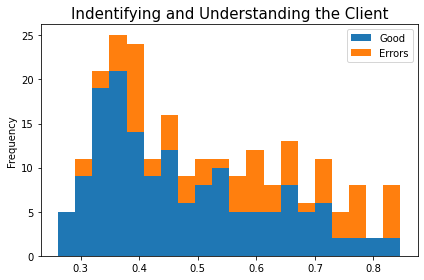

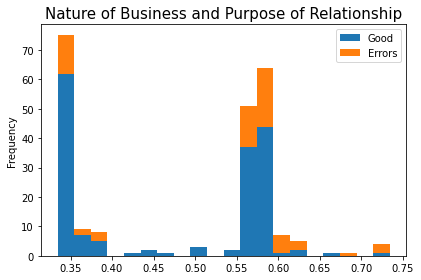

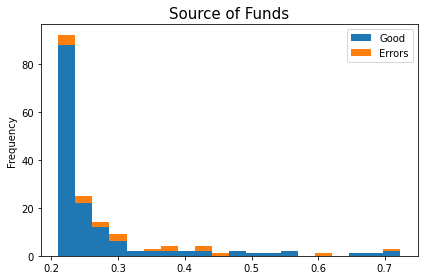

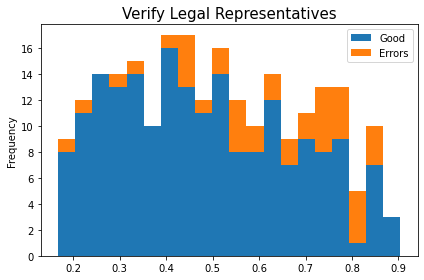

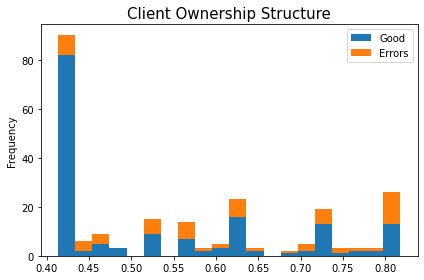

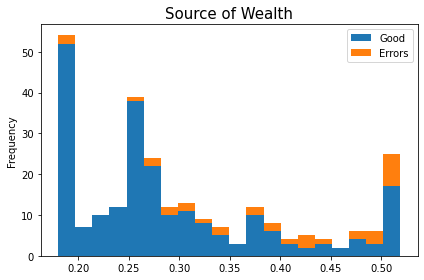

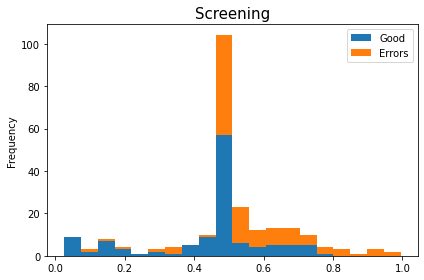

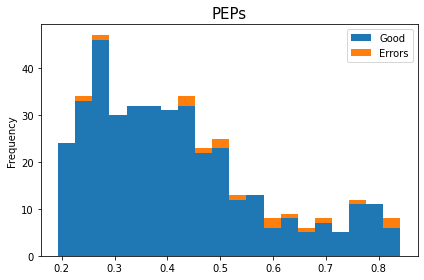

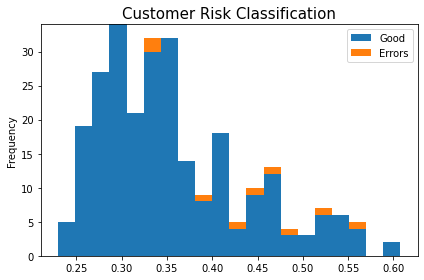

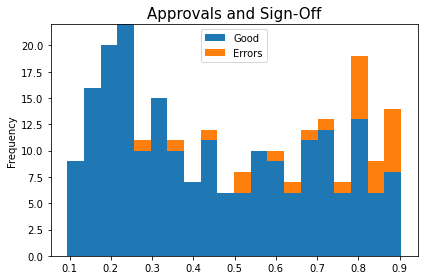

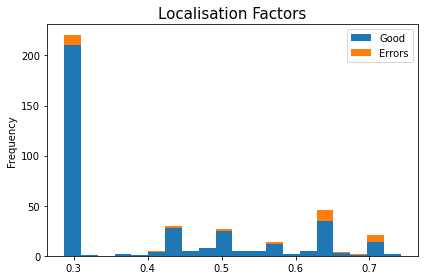

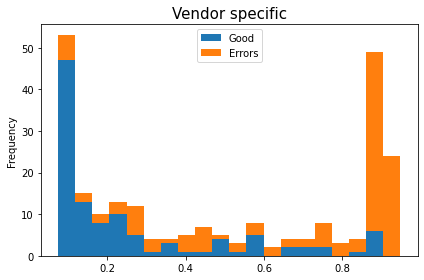

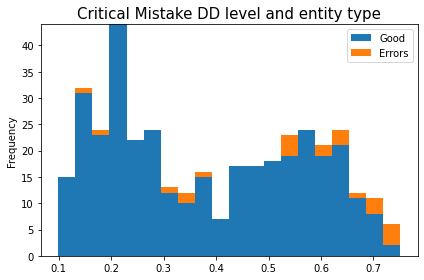

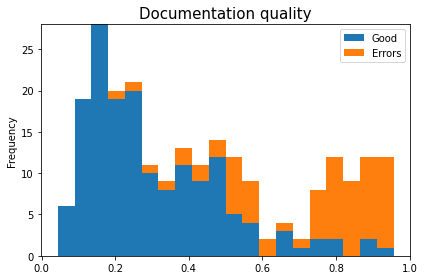

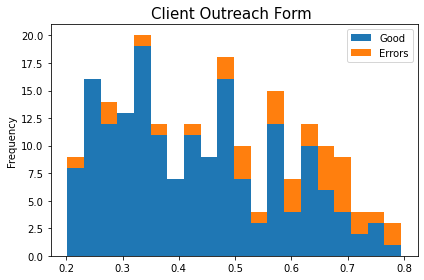

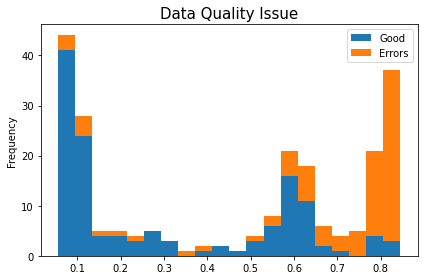

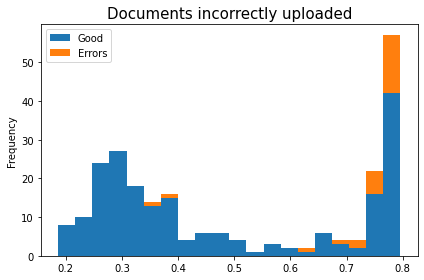

In [46]:
for idx, cat in enumerate(categories):
    plot_data = test[test['CategoryName'] == cat]
    #fig, ax = plt.subplots(figsize=(10,8))
    #plot_data.pivot(columns='Label').Score.plot(kind = 'hist', stacked=True, bins=10)
    pd.DataFrame({'Good': plot_data.groupby('Label').get_group(0).Score,
                  'Errors':   plot_data.groupby('Label').get_group(1).Score}).plot.hist(stacked=True, bins=20)
    plt.title(cat, fontsize=15)
    plt.tight_layout()
    plt.savefig(out_path + 'StackedHist_' + str(idx) + '_' + cat)
    plt.show()

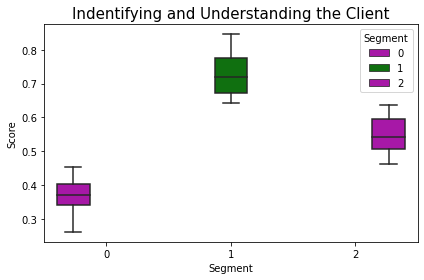

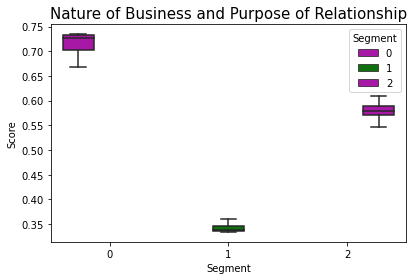

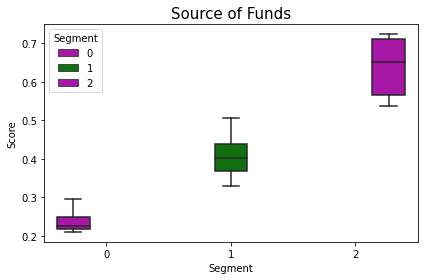

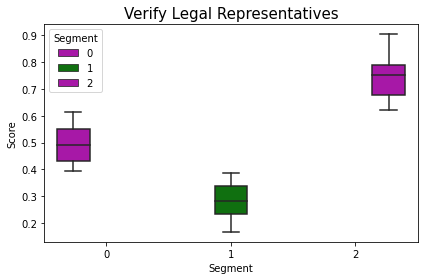

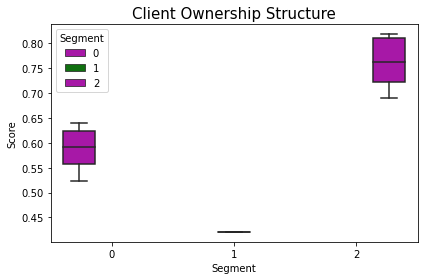

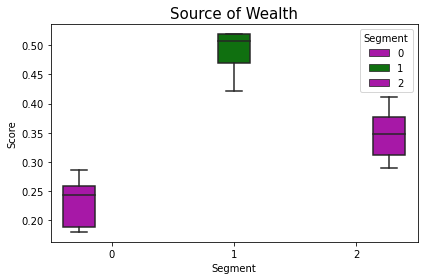

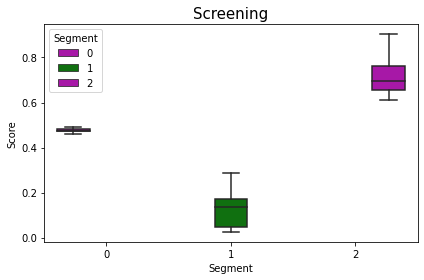

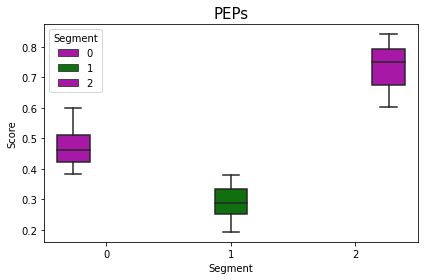

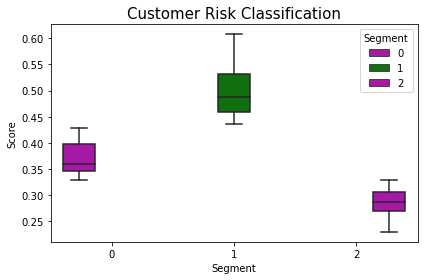

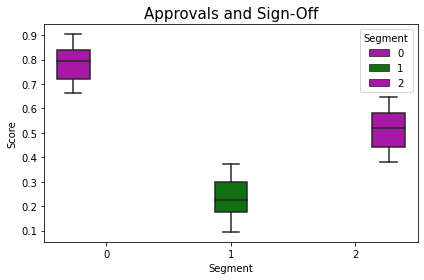

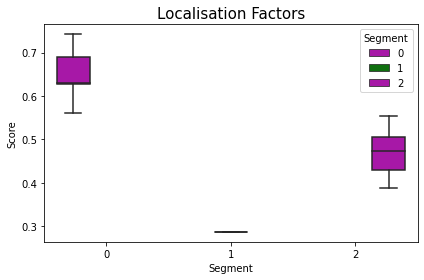

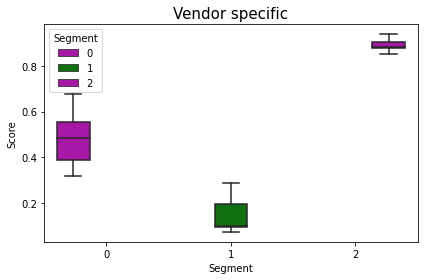

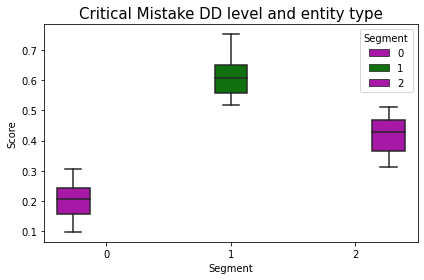

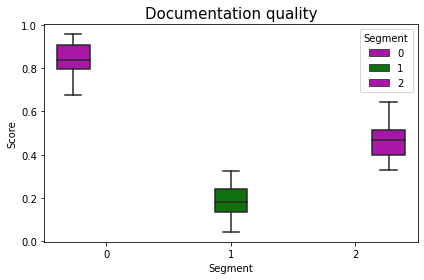

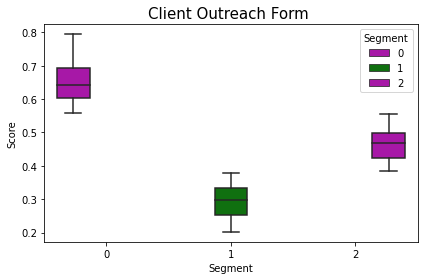

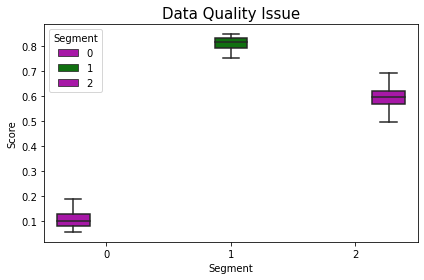

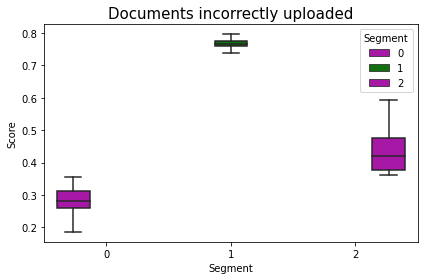

In [60]:
for idx, cat in enumerate(categories):
    kmeans = KMeans(n_clusters=3)  #, random_state=1
    kmeans_data = kmeans_test[kmeans_test['CategoryName'] == cat]
    kmeans.fit(kmeans_data[['Score']])
    
    segment_labels = kmeans.labels_
    data_clustered = kmeans_data.assign(Segment=segment_labels)
    sns.boxplot(x="Segment", y='Score',
                hue="Segment", palette=["m", "g"], showfliers=False,
                data=data_clustered)
    plt.title(cat, fontsize=15)
    plt.tight_layout()
    stats_segments = data_clustered.groupby(['Segment']).agg({'Score': [np.min, np.max]})
    plt.show()
    #stats_segments